In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fpath_gset = {\
'knowledge': '../../results/2021-07-01-high-conf-ADgenes/AD-genes-knowledge-extended',
'TWAS2+': '../../results/2021-07-01-high-conf-ADgenes/AD-genes-TWAS2plus',
'agora2+': '../../resources/agora/AD-genes-agora-2plus-nominations',
'agora': '../../resources/agora/AD-genes-agora',
'DESudhir': '../../resources/CMap/sudhir-varma/up-down.genes-noNAs',
'AD DE APOE3-APOE3': '../../results/2021-11-28-ad-de-genes-apoe/ad-de-genes-apoe3-apoe3',
'AD DE APOE4-APOE4': '../../results/2021-11-28-ad-de-genes-apoe/ad-de-genes-apoe4-apoe4',
'APOE3-4 DE neuron': '../../results/2021-12-08-apoe-de-genes-tunahan/Neuron-apoe-de',
'APOE3-4 DE astrocyte': '../../results/2021-12-08-apoe-de-genes-tunahan/Astrocyte-apoe-de',
'APOE3-4 DE microglia': '../../results/2021-12-08-apoe-de-genes-tunahan/Microglia-like-apoe-de',
'rMTA-APOE3-4': '../../results/2022-02-25-dilara-rmta-geneset/rmta-apoe3-apoe4',
             }

In [3]:
describe_gset = {\
'knowledge': 'curated AD genes from the DISEASES database pulling from UniProtKB, AmyCo, GHR',
'TWAS2+': 'AD genes supported by two or more TWAS',
'agora2+': 'AD genes supported by two or more studies in Agora https://agora.adknowledgeportal.org',
'agora': 'AD genes supported by any study in Agora https://agora.adknowledgeportal.org',
'DESudhir': 'AD vs control differentially expressed genes from Sudhir Varma',
'AD DE APOE3-APOE3': 'AD vs control differentially expressed genes given APOE3/APOE3 genotype from https://doi.org/10.1038/s43587-021-00122-7',
'AD DE APOE4-APOE4': 'AD vs control differentially expressed genes given APOE4/APOE4 genotype from https://doi.org/10.1038/s43587-021-00122-7',
'APOE3-4 DE neuron': 'APOE4 vs APOE3 differentially expressed genes iPSC-derived neurons from https://doi.org/10.1016/j.neuron.2018.05.008',
'APOE3-4 DE astrocyte': 'APOE4 vs APOE3 differentially expressed genes iPSC-derived astrocytes from https://doi.org/10.1016/j.neuron.2018.05.008',
'APOE3-4 DE microglia': 'APOE4 vs APOE3 differentially expressed genes iPSC-derived microglia from https://doi.org/10.1016/j.neuron.2018.05.008',
'rMTA-APOE3-4': 'genes with top rMTA score for the APOE4 -> APOE3 metabolic transition',
             }

In [4]:
def read_gset(fpath):
    with open(fpath) as f:
        gset = set([s.strip() for s in f.readlines()])
    return(gset)

gset = {name: read_gset(fpath) for name, fpath in fpath_gset.items()}

In [5]:
def get_jaccard(gsetA, gsetB):
    jix = len(gsetA.intersection(gsetB)) / len(gsetA.union(gsetB))
    return(jix)

jaccard = pd.DataFrame([[get_jaccard(A, B) for B in gset.values()] for A in gset.values()], index=gset.keys(), columns=gset.keys())

In [6]:
fpath_prox = {\
'knowledge': 'AD-genes-knowledge-extended/AD-genes-knowledge-extended.csv',
'TWAS2+': 'AD-genes-TWAS2plus/AD-genes-TWAS2plus.csv',
'agora2+': 'AD-genes-agora-2plus-nominations/AD-genes-agora-2plus-nominations.csv',
'agora': 'AD-genes-agora/AD-genes-agora.csv',
'DESudhir': 'up-down-sudhir/up-down-sudhir.csv',
'AD DE APOE3-APOE3': 'ad-de-genes-apoe3-apoe3/ad-de-genes-apoe3-apoe3.csv',
'AD DE APOE4-APOE4': 'ad-de-genes-apoe4-apoe4/ad-de-genes-apoe4-apoe4.csv',
'APOE3-4 DE neuron': 'apoe-de-genes-Neuron/apoe-de-genes-Neuron.csv',
'APOE3-4 DE astrocyte': 'apoe-de-genes-Astrocyte/apoe-de-genes-Astrocyte.csv',
'APOE3-4 DE microglia': 'apoe-de-genes-Microglia-like/apoe-de-genes-Microglia-like.csv',
'rMTA-APOE3-4': 'rmta-apoe3-apoe4/rmta-apoe3-apoe4.csv',
             }

In [7]:
def read_prox(fpath):
    fpath = '../../results/proximity-runs/' + fpath
    df = pd.read_csv(fpath, index_col=0)
    df = df.sort_values('z').dropna(subset=['z'])
    df['rank'] = np.arange(len(df), dtype=np.int64) + 1
    return(df)

prox = {name: read_prox(fpath) for name, fpath in fpath_prox.items()}

In [8]:
sel_gsets = ['knowledge', 'TWAS2+', 'agora2+', 'AD DE APOE3-APOE3', 'AD DE APOE4-APOE4', 'APOE3-4 DE neuron', 'APOE3-4 DE astrocyte', 'APOE3-4 DE microglia']
prox_sel = {k: v for k, v in prox.items() if k in sel_gsets}
jaccard_sel = jaccard.loc[sel_gsets, sel_gsets]
jaccard_sel

knowledge    TWAS2+   agora2+  AD DE APOE3-APOE3  \
knowledge              1.000000  0.042857  0.010989           0.003067   
TWAS2+                 0.042857  1.000000  0.037383           0.000000   
agora2+                0.010989  0.037383  1.000000           0.028169   
AD DE APOE3-APOE3      0.003067  0.000000  0.028169           1.000000   
AD DE APOE4-APOE4      0.000000  0.000000  0.022409           0.279318   
APOE3-4 DE neuron      0.000000  0.000000  0.015748           0.002755   
APOE3-4 DE astrocyte   0.000000  0.000000  0.000000           0.000000   
APOE3-4 DE microglia   0.005319  0.000000  0.008889           0.002169   

                      AD DE APOE4-APOE4  APOE3-4 DE neuron  \
knowledge                      0.000000           0.000000   
TWAS2+                         0.000000           0.000000   
agora2+                        0.022409           0.015748   
AD DE APOE3-APOE3              0.279318           0.002755   
AD DE APOE4-APOE4              1.000000           0.000000   
APOE3-4 DE neuron              0.000000           1.000000   
APOE3-4 DE astrocyte           0.004376           0.027650   
APOE3-4 DE microglia           0.006536           0.027273   

                      APOE3-4 DE astrocyte  APOE3-4 DE microglia  
knowledge                         0.000000              0.005319  
TWAS2+                            0.000000              0.000000  
agora2+                           0.000000              0.008889  
AD DE APOE3-APOE3                 0.000000              0.002169  
AD DE APOE4-APOE4                 0.004376              0.006536  
APOE3-4 DE neuron                 0.027650              0.027273  
APOE3-4 DE astrocyte              1.000000              0.025559  
APOE3-4 DE microglia              0.025559              1.000000

In [9]:
# The same but removing the diagonal and lower triangular values
#pd.DataFrame(np.triu(jaccard_sel.to_numpy(), k=1), index=jaccard_sel.index, columns=jaccard_sel.columns)

## Pairwise similarity of drug prioritization under various AD gene sets
### Network proximity based Z score

['named-figure/prox-z-scatterplot_matrix.png',
 'named-figure/prox-z-scatterplot_matrix.pdf']

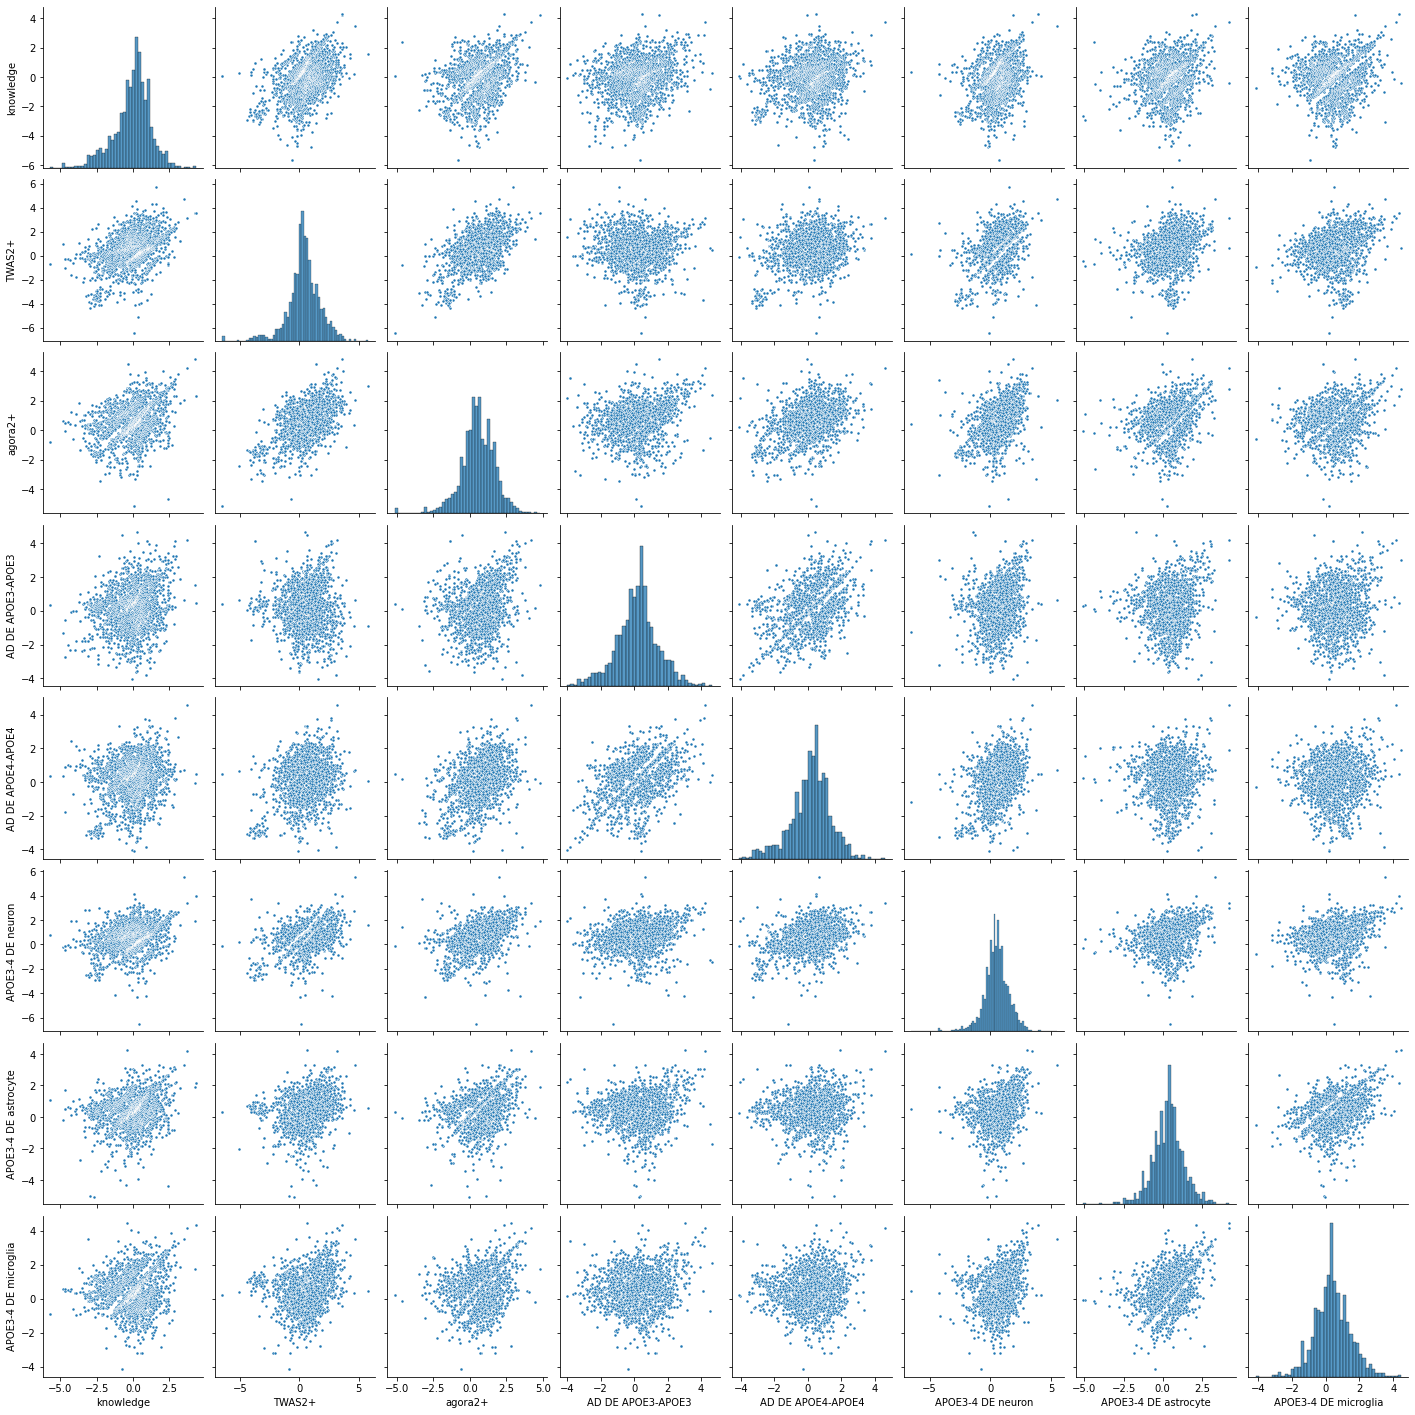

In [10]:
def scatterplot_matrix(col='z', prox=prox_sel):
    df = pd.concat([df[col] for df in prox.values()], axis=1)
    df = df.set_axis(prox.keys(), axis=1)
    g = sns.pairplot(df, markers='.')
    return(g)

g = scatterplot_matrix('z')
attila_utils.savefig(g, 'prox-z-scatterplot_matrix')

['named-figure/prox-z-scatterplot_matrix-full.png',
 'named-figure/prox-z-scatterplot_matrix-full.pdf']

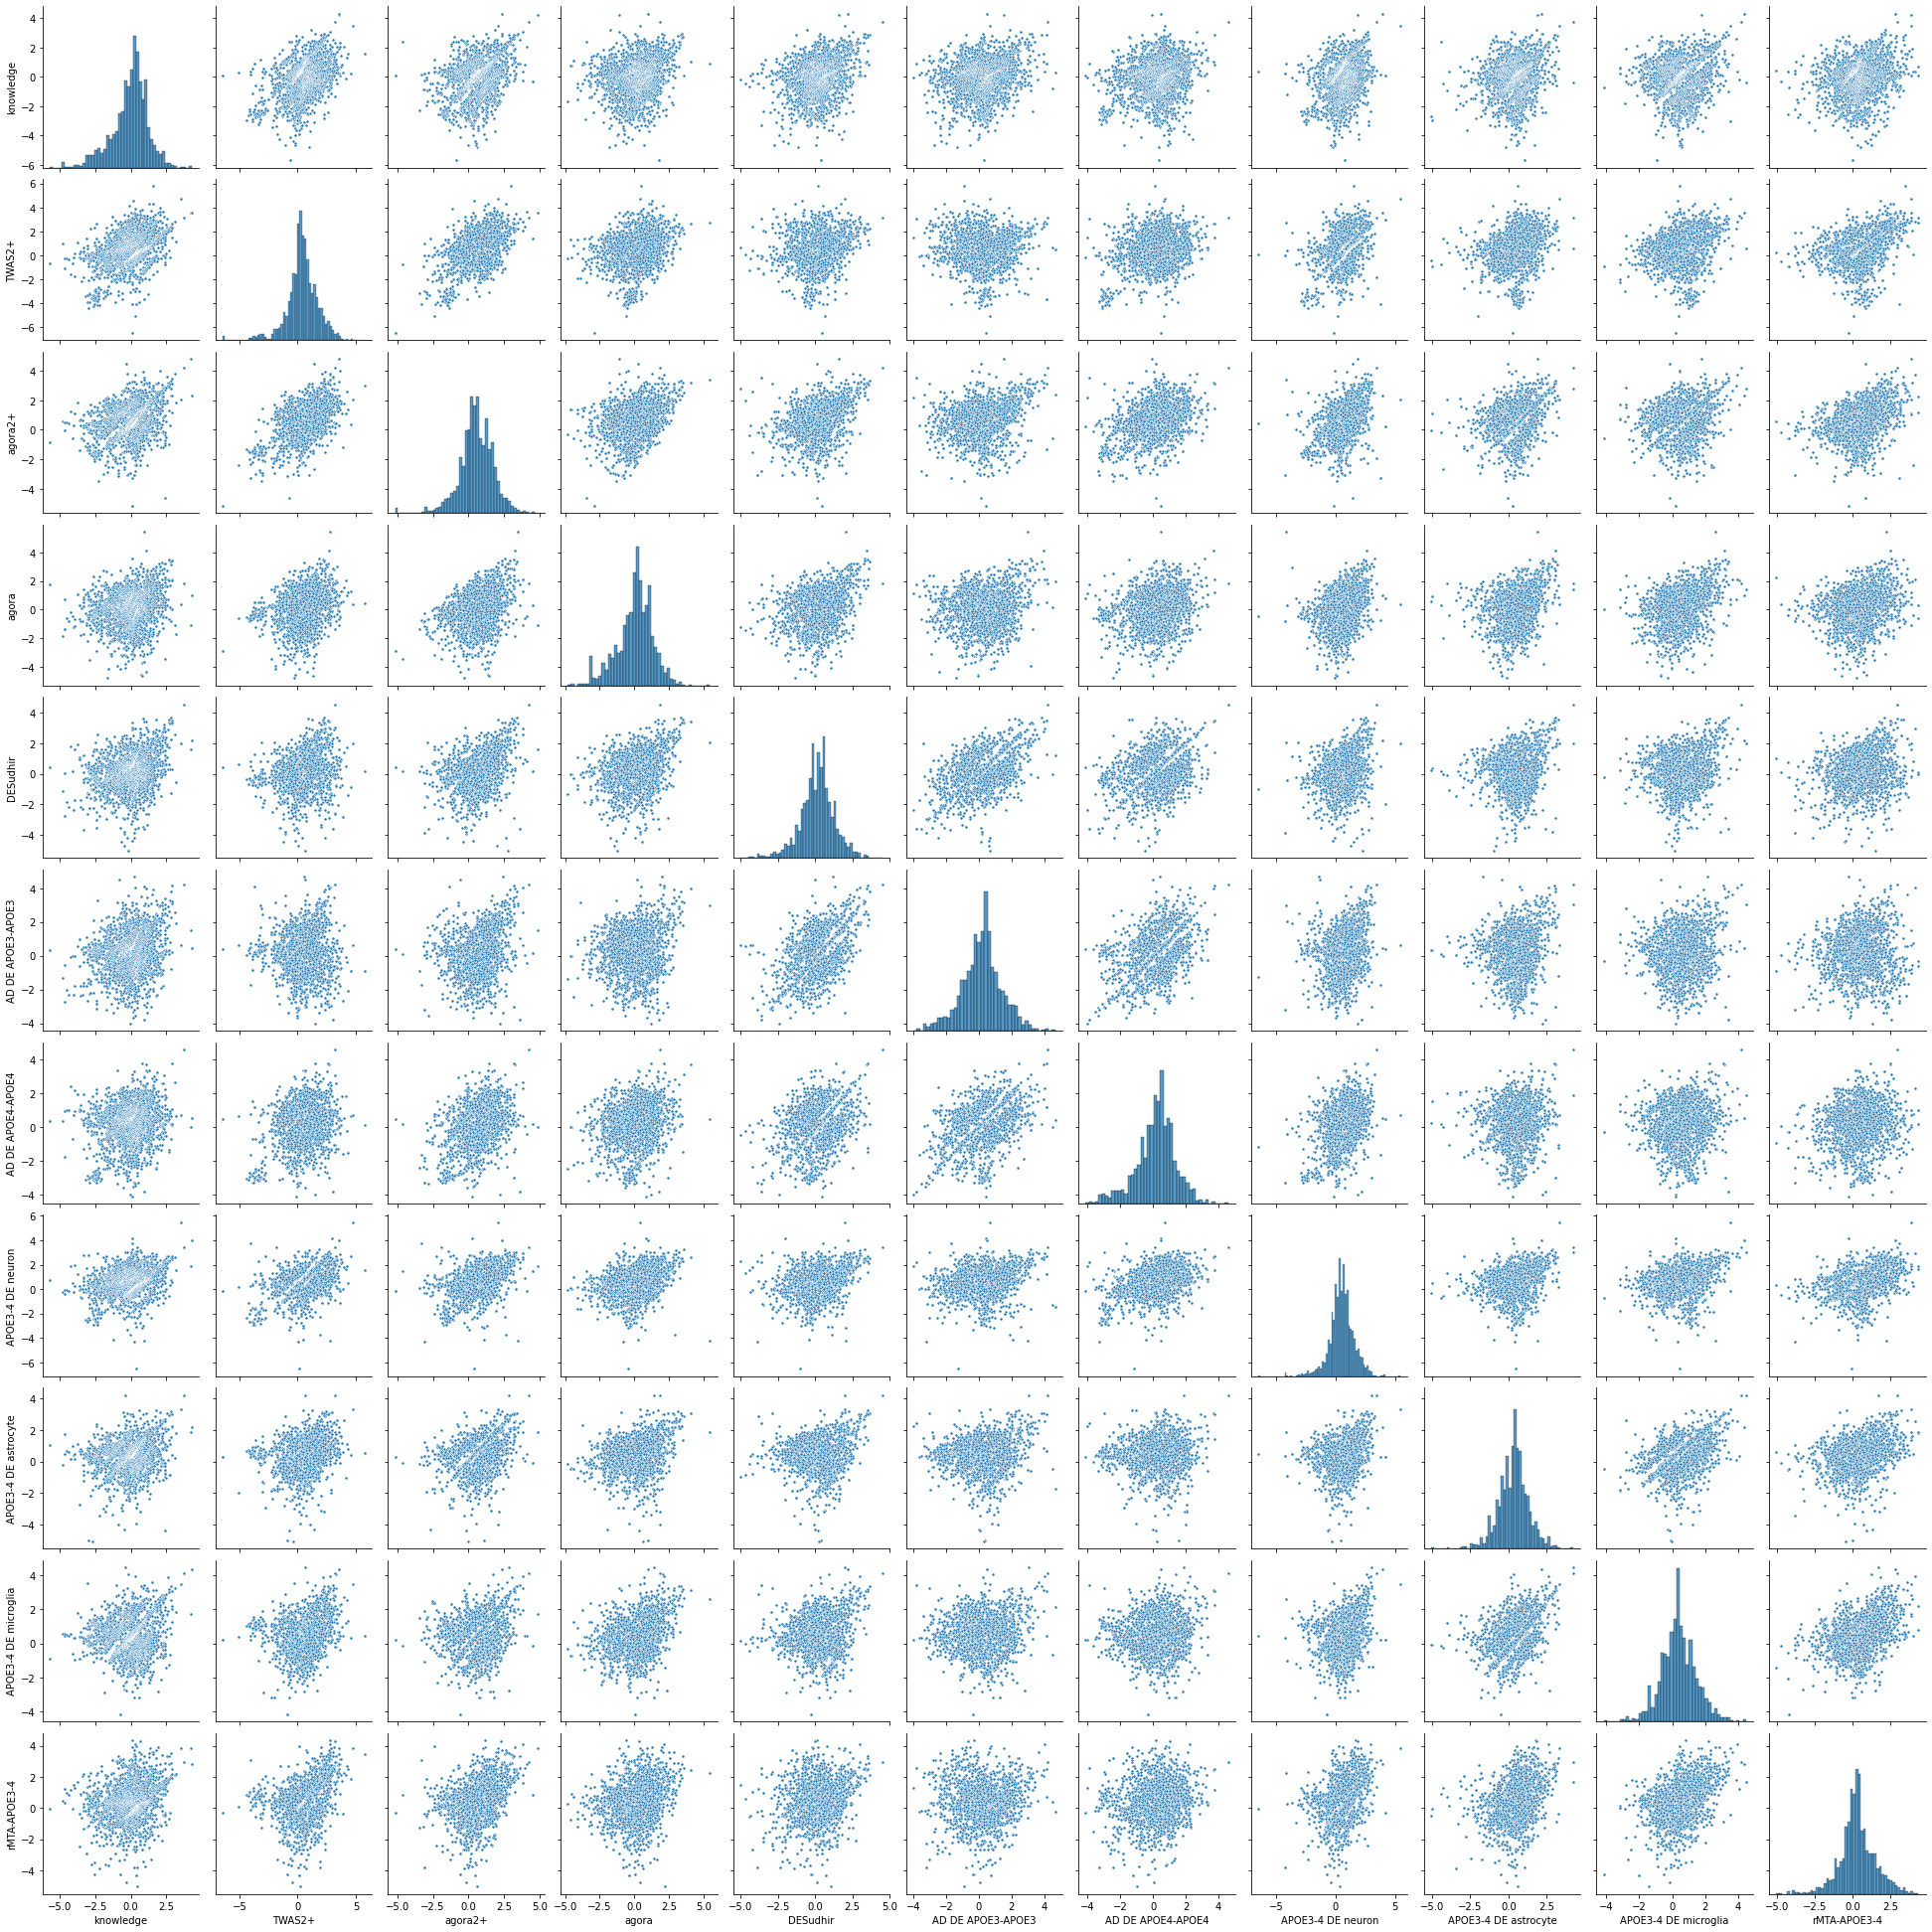

In [11]:
g = scatterplot_matrix('z', prox=prox)
attila_utils.savefig(g, 'prox-z-scatterplot_matrix-full')

Now the same information is summarized with Pearson's correlation coefficients

['named-figure/corr-coef-input-AD-sets.png',
 'named-figure/corr-coef-input-AD-sets.pdf']

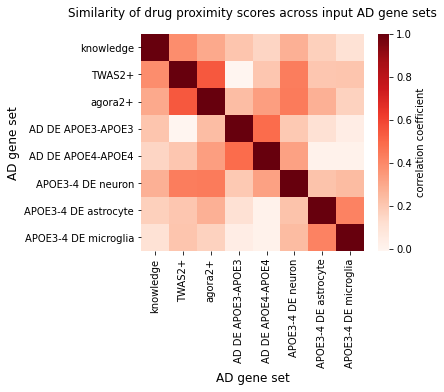

In [12]:
def correlation_heatmap(col='z', prox=prox):
    corr = pd.concat([df[col] for df in prox.values()], axis=1)
    corr = corr.set_axis(prox.keys(), axis=1)
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.set_title(r'Similarity of drug proximity scores across input AD gene sets', y=1.05)
    sns.heatmap(corr.corr(), cmap='Reds', ax=ax)
    ax.set_xlabel('AD gene set', fontsize=12)
    ax.set_ylabel('AD gene set', fontsize=12)
    axi = fig.axes[1]
    axi.set_ylabel('correlation coefficient')
    return((fig, ax))

fig, ax = correlation_heatmap(prox=prox_sel)
attila_utils.savefig(fig, 'corr-coef-input-AD-sets')

['named-figure/corr-coef-input-AD-sets-full.png',
 'named-figure/corr-coef-input-AD-sets-full.pdf']

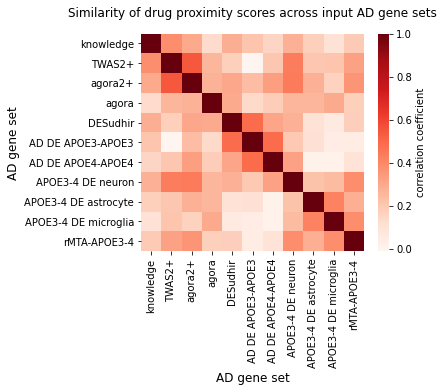

In [13]:
fig, ax = correlation_heatmap(prox=prox)
attila_utils.savefig(fig, 'corr-coef-input-AD-sets-full')

### Similarity of AD gene sets
The Jaccard index for pairs of AD gene sets shows a similar pattern suggesting that **similar input AD gene sets lead to similar drug score based on network proximity**.

['named-figure/jaccard-input-AD-sets.png',
 'named-figure/jaccard-input-AD-sets.pdf']

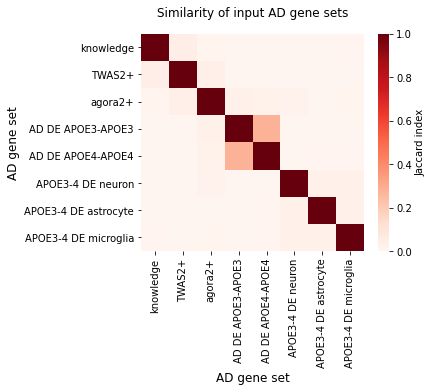

In [14]:
def jaccard_plot(jaccard):
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.set_title(r'Similarity of input AD gene sets', y=1.05)
    sns.heatmap(jaccard, cmap='Reds', ax=ax)
    ax.set_xlabel('AD gene set', fontsize=12)
    ax.set_ylabel('AD gene set', fontsize=12)
    axi = fig.axes[1]
    axi.set_ylabel('Jaccard index')
    return((fig, ax))

fig, ax = jaccard_plot(jaccard_sel)
attila_utils.savefig(fig, 'jaccard-input-AD-sets')

['named-figure/jaccard-input-AD-sets-full.png',
 'named-figure/jaccard-input-AD-sets-full.pdf']

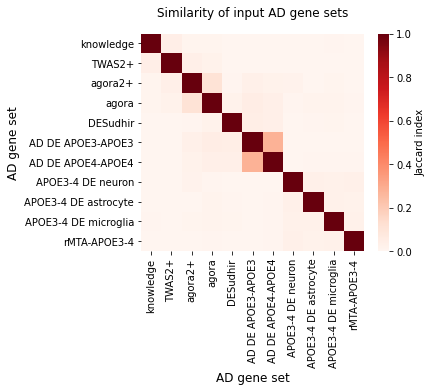

In [15]:
fig, ax = jaccard_plot(jaccard)
attila_utils.savefig(fig, 'jaccard-input-AD-sets-full')

### Rank based similarity of drug prioritization

This plot shows qualitatively similar picture as its Z-score based equivalent.

['named-figure/prox-rank-scatterplot_matrix.png',
 'named-figure/prox-rank-scatterplot_matrix.pdf']

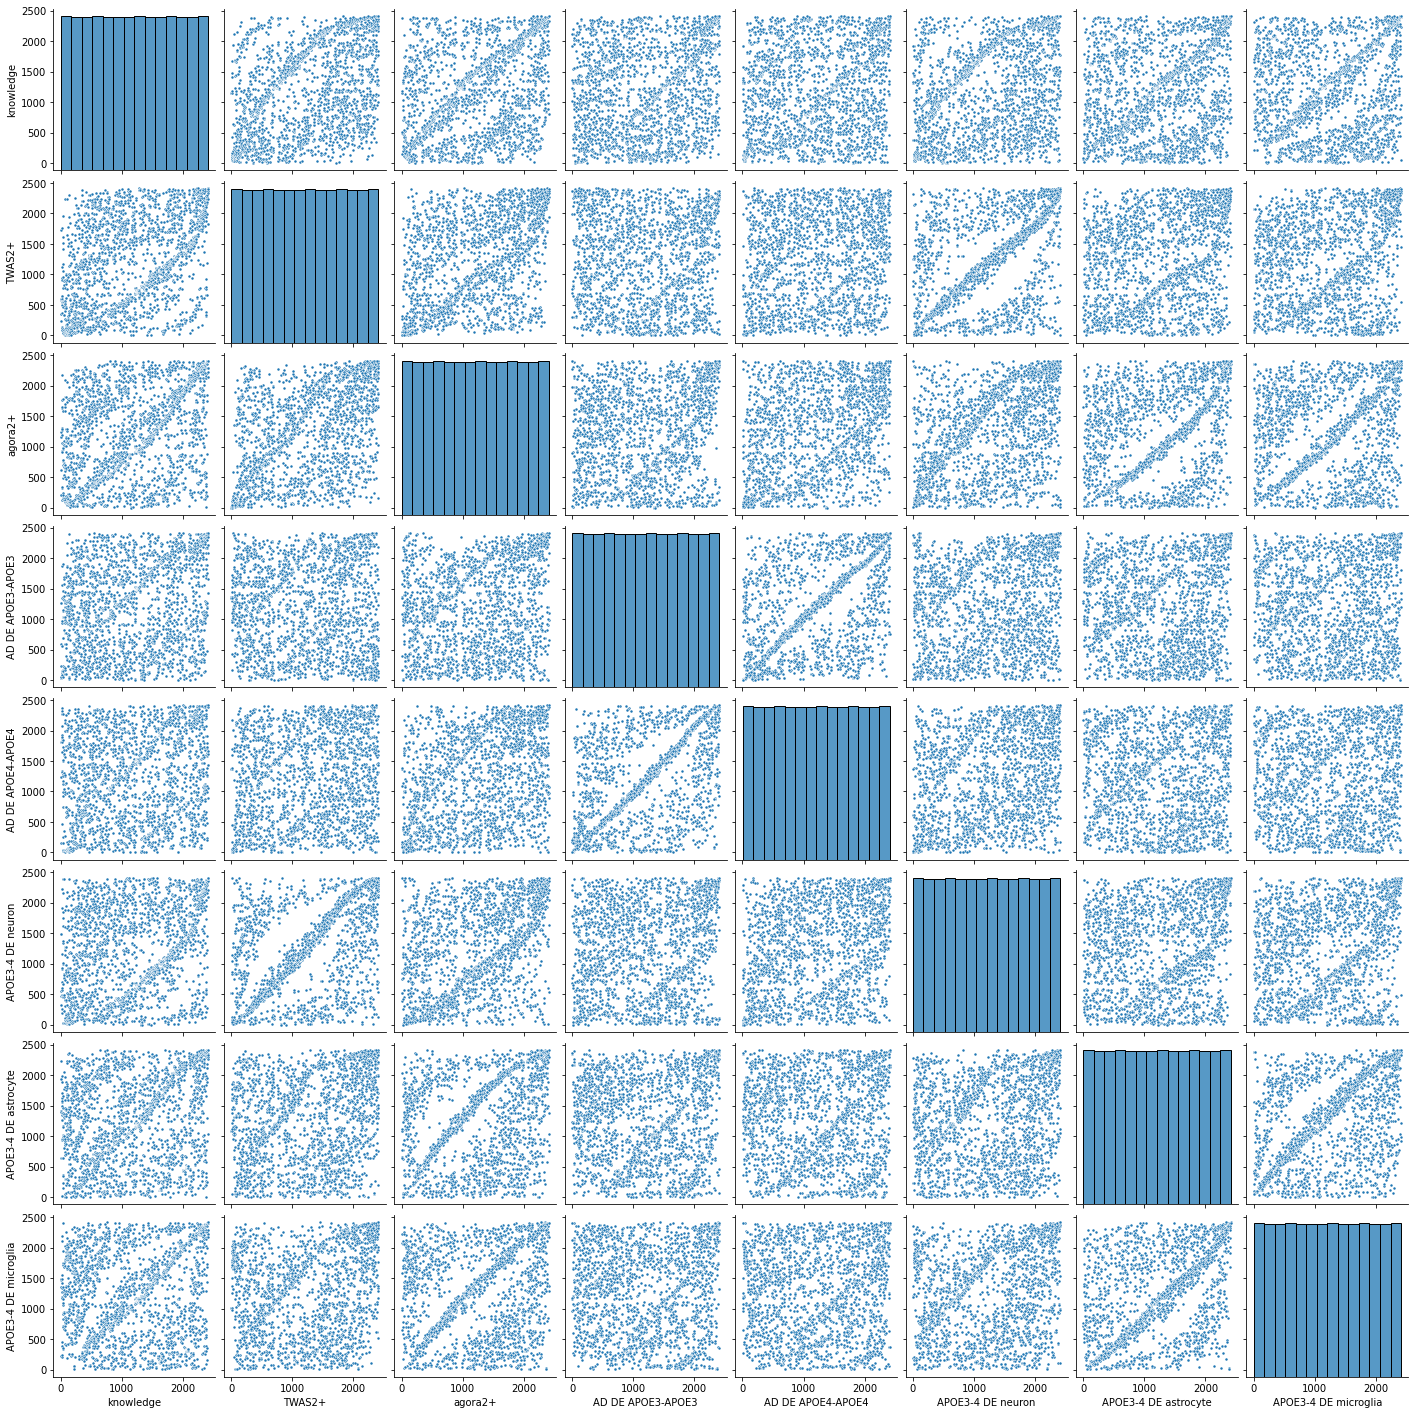

In [16]:
g = scatterplot_matrix('rank', prox_sel)
attila_utils.savefig(g, 'prox-rank-scatterplot_matrix')

['named-figure/prox-rank-scatterplot_matrix-full.png',
 'named-figure/prox-rank-scatterplot_matrix-full.pdf']

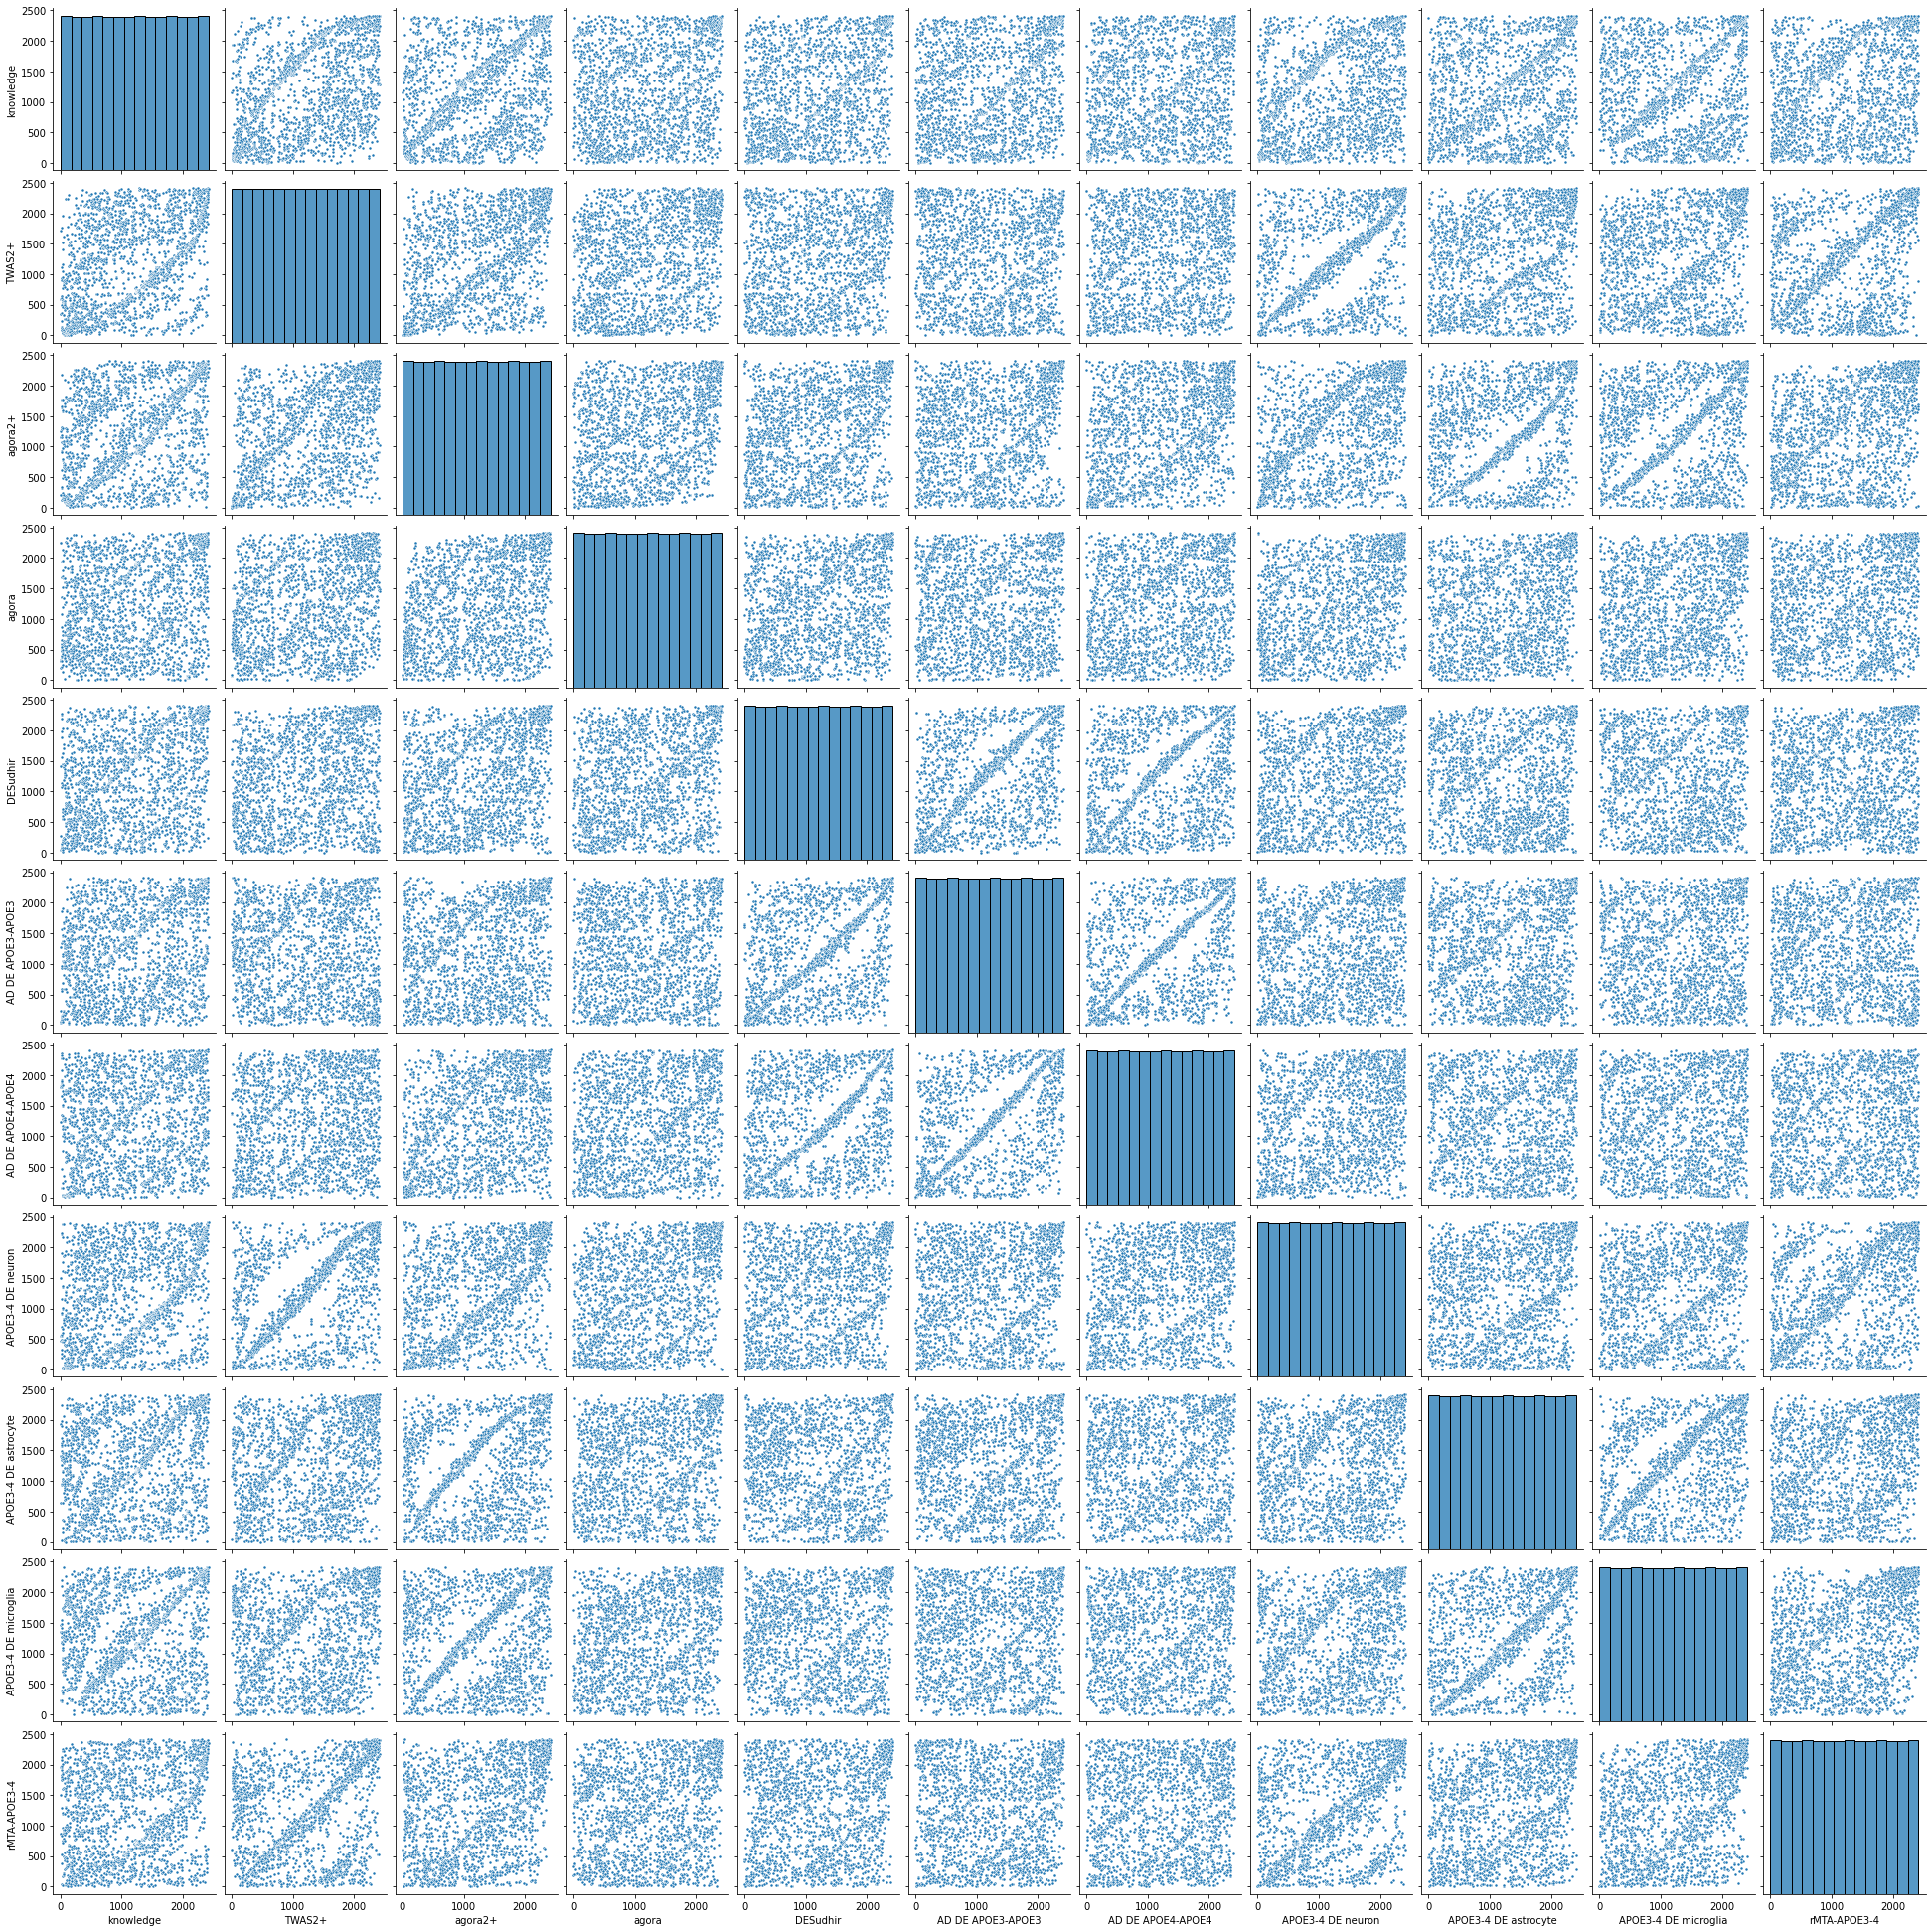

In [17]:
g = scatterplot_matrix('rank', prox)
attila_utils.savefig(g, 'prox-rank-scatterplot_matrix-full')

In [18]:
def extract_scores(df, name=None):
    sel_cols = ['rank', 'z', 'p']
    df = df[sel_cols]
    df.columns = pd.MultiIndex.from_product([[name], sel_cols])
    return(df)

sel_cols = ['drug_name', 'max_phase', 'indication_class', 'uniprot_name', 'target_name']
info = prox['knowledge'][sel_cols]
info.columns = pd.MultiIndex.from_product([['drug information'], sel_cols])
merged_prox = pd.concat([info] + [extract_scores(df, name) for name, df in prox.items()], axis=1)

# write to an Excel document
fpath = '../../results/2021-12-02-proximity-various-ADgenesets/merged-proximity-chembl.xlsx'
with pd.ExcelWriter(fpath) as writer:
    # Manually remove blank row in Excel!  See issue:
    # https://stackoverflow.com/questions/52497554/blank-line-below-headers-created-when-using-multiindex-and-to-excel-
    merged_prox.to_excel(writer, 'drug rankings')
    pd.Series(describe_gset.values(), index=describe_gset.keys()).to_excel(writer, 'gene set description', header=False)
    for name, genes in gset.items():
        l = list(genes)
        l.sort()
        pd.Series(l).to_excel(writer, name, header=False, index=False)

fpath = '../../results/2021-12-02-proximity-various-ADgenesets/merged-proximity-chembl.csv'
merged_prox.to_csv(fpath)

### Ranked objects

In [19]:
def get_ranked_chembl_ids(merged_prox, drug_names=False):
    ranks = merged_prox.xs('rank', axis=1, level=1)
    def helper(x):
        val = merged_prox[('drug information', 'drug_name')].to_list() if drug_names else ranks[x].index
        return(val)
    df = pd.concat([pd.Series(helper(c), index=ranks[c]) for c in ranks], axis=1)
    df.columns = ranks.columns
    df.index = df.index.set_names('rank')
    return(df)

ranked_chembl_ids = get_ranked_chembl_ids(merged_prox)
ranked_drug_names = get_ranked_chembl_ids(merged_prox, drug_names=True)
# write to disk
dirpath = '../../results/2021-12-02-proximity-various-ADgenesets/'
ranked_chembl_ids.to_csv(dirpath + 'ranked-chembl-ids.csv')
ranked_drug_names.to_csv(dirpath + 'ranked-drug-names.csv')

In [20]:
%connect_info

{
  "shell_port": 49415,
  "iopub_port": 49416,
  "stdin_port": 49417,
  "control_port": 49419,
  "hb_port": 49418,
  "ip": "127.0.0.1",
  "key": "0bbe2e13-6025c3ede56c299e8f9d880b",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-53378c55-f86b-4871-85de-a3a2c58c87e2.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
